<a href="https://colab.research.google.com/github/TiagoSpiandorello/Analise_de_portfolio_de_acoes/blob/main/analise_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importação das bibliotecas necessárias para o projeto

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as wb
from scipy.stats import norm
%matplotlib inline

# 1- Extração dos dados de um portfólio de ações do site Yahoo Finance

In [2]:
# PETR4 = Petrobras
# BBDC4 = Bradesco
# ABEV3 = AMBEV
# WEGE3 = Weg
# VALE3 - Vale

acao1 = 'PETR4.SA'
acao2 = 'BBDC4.SA'
acao3 = 'ABEV3.SA'
acao4 = 'WEGE3.SA'
acao5 = 'VALE3.SA'

tickers = [acao1,acao2,acao3,acao4,acao5]
bolsas = pd.DataFrame()
for t in tickers:
    bolsas[t] = wb.DataReader(t, data_source='yahoo',start='2010-1-1')['Adj Close']

bolsas.tail(10)

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA
Date,,,,,
2021-06-11,28.570000,28.040001,18.940001,34.209999,112.125732
2021-06-14,28.750000,27.920000,19.480000,34.880001,111.517746
2021-06-15,29.030001,27.940001,19.129999,35.459999,109.340736
2021-06-16,29.139999,28.080000,19.090000,34.830002,106.055611
2021-06-17,28.129999,27.959999,19.010000,34.419998,103.849182
2021-06-18,28.320000,27.600000,18.760000,35.189999,106.977402
2021-06-21,28.950001,27.670000,18.730000,35.250000,107.977654
2021-06-22,29.100000,27.160000,18.290001,34.290001,109.242676
2021-06-23,29.299999,27.040001,17.990000,33.950001,110.880333


# 2- Cálculo da taxa de retorno histórica do portfólio.

<function matplotlib.pyplot.show>

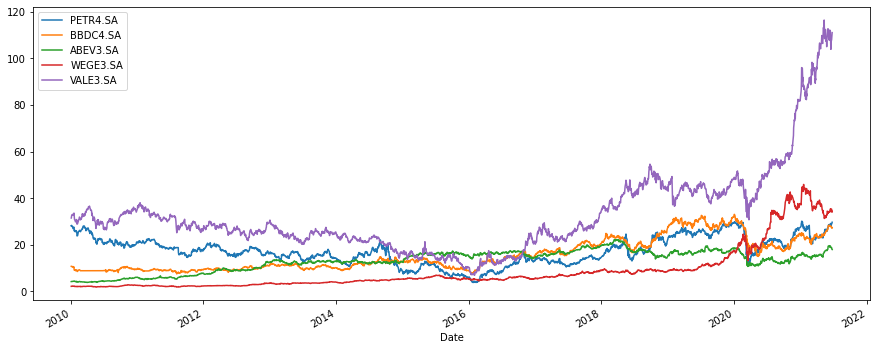

In [3]:
bolsas.plot(figsize = (15, 6));
plt.show

## Normalização dos preços das ações para base 100

### (P1 / P0) * 100

#### Essa manipulação permite comparar o comportamento das ações em uma situação hipotética em que todas iniciam com valor 100, o que torna mais fácil a visualização da forma como o preço das ações evolui ao longo do tempo. 

In [4]:
bolsas.iloc[0]

PETR4.SA    28.142263
BBDC4.SA    10.743359
ABEV3.SA     4.187932
WEGE3.SA     2.144630
VALE3.SA    31.468279
Name: 2010-01-04 00:00:00, dtype: float64

<function matplotlib.pyplot.show>

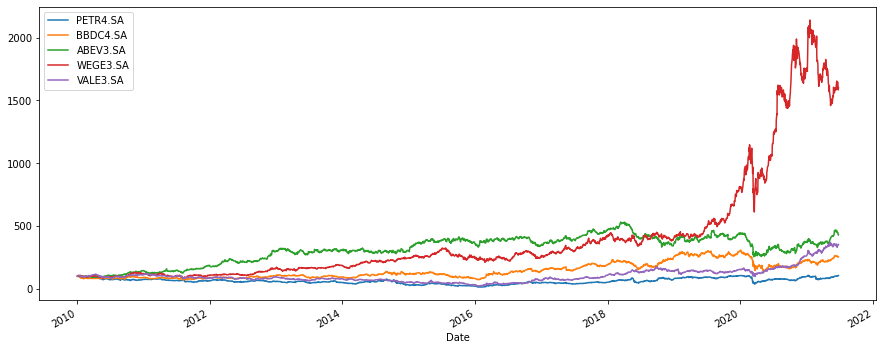

In [5]:
(bolsas / bolsas.iloc[0] * 100).plot(figsize= (15,6));
plt.show

## Taxa de retorno simples = (preço final - preço inicial) / preço inicial


In [6]:
retorno_simples = (bolsas / bolsas.shift(1)) - 1
retorno_simples.head()

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.008574,-0.004955,0.005882,-0.002182,0.009322
2010-01-06,0.013513,-0.008001,0.010202,0.005468,0.021166
2010-01-07,-0.009333,-0.002688,0.004695,0.016857,0.004145
2010-01-08,-0.005384,-0.001078,-0.001921,0.036363,0.009758


In [7]:
# Peso é o percentual que cada ação representa no portfólio. 

# No primeiro cenário, as ações estão distribuídas igualmente, cada uma representando 20% do total de ações.

pesos = np.array([0.2,0.2,0.2,0.2,0.2])
np.dot(retorno_simples, pesos)

array([        nan, -0.00010153,  0.00846965, ..., -0.01045205,
       -0.00177446,  0.00593223])

In [8]:
# Retorno anual médio

retorno_anual = retorno_simples.mean() * 250
retorno_anual

PETR4.SA    0.115813
BBDC4.SA    0.141142
ABEV3.SA    0.162983
WEGE3.SA    0.294002
VALE3.SA    0.199091
dtype: float64

In [9]:
np.dot(retorno_anual, pesos)

0.18260609032085165

In [10]:
pfolio1 = str(round(np.dot(retorno_anual, pesos), 5) * 100) + ' %'
print('Esta carteira de ações possui um retorno de ' + pfolio1)

Esta carteira de ações possui um retorno de 18.261 %


In [11]:
# No segundo cenário, as ações não estão distribuídas igualmente, de forma que a WEGE3 representa 40%, a PETR4 10% e as restantes 20% cada do total de ações.
 
pesos2 = np.array([0.1,0.2,0.2,0.4,0.2])
pfolio2 = str(round(np.dot(retorno_anual, pesos2), 5) * 100) + ' %'
print('Esta carteira de ações possui um retorno de ' + pfolio2)

Esta carteira de ações possui um retorno de 22.983 %


In [12]:
if (pfolio1 > pfolio2):
  print('O primeiro portfólio possui rendimento superior ao segundo.')
elif (pfolio1 < pfolio2):
  print('O segundo portfólio possui rendimento superior ao primeiro.')
else:
  print('Ambos portfólios possuem o mesmo rendimento.')

O segundo portfólio possui rendimento superior ao primeiro.


## Taxa de retorno logarítmica = log preço final / log preço inicial


In [13]:
# Cálculo da taxa de retorno logarítmica das ações

retorno = np.log(bolsas / bolsas.shift(1))
retorno

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.008611,-0.004968,0.005865,-0.002185,0.009279
2010-01-06,0.013423,-0.008033,0.010150,0.005453,0.020945
2010-01-07,-0.009377,-0.002692,0.004684,0.016717,0.004137
2010-01-08,-0.005398,-0.001078,-0.001923,0.035718,0.009711
...,...,...,...,...,...
2021-06-18,0.006732,-0.012959,-0.013238,0.022124,0.029678
2021-06-21,0.022002,0.002533,-0.001600,0.001704,0.009307
2021-06-22,0.005168,-0.018603,-0.023772,-0.027612,0.011647


In [14]:
acao1 = retorno.columns[0]
acao2 = retorno.columns[1]
acao3 = retorno.columns[2]
acao4 = retorno.columns[3]
acao5 = retorno.columns[4]

In [15]:
media1 = retorno[acao1].mean()
media2 = retorno[acao2].mean()
media3 = retorno[acao3].mean()
media4 = retorno[acao4].mean()
media5 = retorno[acao5].mean()

std1 = retorno[acao1].std()
std2 = retorno[acao1].std()
std3 = retorno[acao1].std()
std4 = retorno[acao1].std()
std5 = retorno[acao1].std()

LOGN_var1 = retorno[acao1].var()
LOGN_var2 = retorno[acao2].var()
LOGN_var3 = retorno[acao2].var()
LOGN_var4 = retorno[acao4].var()
LOGN_var5 = retorno[acao5].var()

print(str(acao1) + "= Retorno Médio: " + str(media1) + " - Desvio Padrão: " + str(std1) + " - Variância: " + str(LOGN_var1))
print(str(acao2) + "= Retorno Médio: " + str(media2) + " - Desvio Padrão: " + str(std2) + " - Variância: " + str(LOGN_var2))
print(str(acao3) + "= Retorno Médio: " + str(media3) + " - Desvio Padrão: " + str(std3) + " - Variância: " + str(LOGN_var3))
print(str(acao4) + "= Retorno Médio: " + str(media4) + " - Desvio Padrão: " + str(std4) + " - Variância: " + str(LOGN_var4))
print(str(acao5) + "= Retorno Médio: " + str(media5) + " - Desvio Padrão: " + str(std5) + " - Variância: " + str(LOGN_var5))

PETR4.SA= Retorno Médio: 1.837016196285606e-05 - Desvio Padrão: 0.029959315890113223 - Variância: 0.0008975606086035907
BBDC4.SA= Retorno Médio: 0.00032748986721355616 - Desvio Padrão: 0.029959315890113223 - Variância: 0.0004746433803935028
ABEV3.SA= Retorno Médio: 0.0005122784976537918 - Desvio Padrão: 0.029959315890113223 - Variância: 0.0004746433803935028
WEGE3.SA= Retorno Médio: 0.0009760832940247873 - Desvio Padrão: 0.029959315890113223 - Variância: 0.000400063636688569
VALE3.SA= Retorno Médio: 0.0004437945811870592 - Desvio Padrão: 0.029959315890113223 - Variância: 0.0007062310860785858


## Índices de ações

### São uma excelente base comparativa para entender como suas ações estão performando.

### Indicam o que esperar se você investir em um portfólio diversificado

In [16]:
# ^BVSP = IBOVESPA - Brasil
# ^GSPC = S&P500 - EUA
# ^IXIC = NASDAQ - EUA
# ^GDAXI = DAX - Alemanha

indice1 = '^GSPC'
indice2 = '^IXIC'
indice3 = '^GDAXI'
indice4 = '^BVSP'

tickers = [indice1,indice2,indice3,indice4]
ind_data = pd.DataFrame()
for t in tickers:
    ind_data[t] = wb.DataReader(t, data_source='yahoo',start='2015-1-1')['Adj Close']

In [17]:
ind_data.head()

,^GSPC,^IXIC,^GDAXI,^BVSP
Date,,,,
2015-01-02,2058.199951,4726.810059,9764.730469,48512.0
2015-01-05,2020.579956,4652.569824,9473.160156,47517.0
2015-01-06,2002.609985,4592.740234,9469.660156,48001.0
2015-01-07,2025.900024,4650.470215,9518.179688,49463.0
2015-01-08,2062.139893,4736.189941,9837.610352,49943.0


<function matplotlib.pyplot.show>

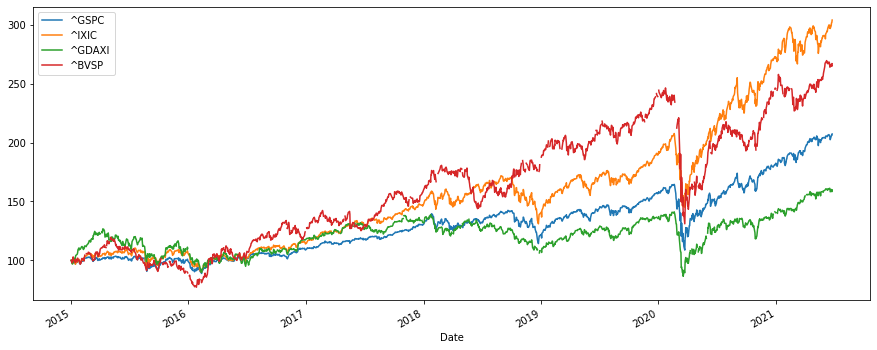

In [18]:
# Normalização dos índices para base 100

(ind_data / ind_data.iloc[0] * 100).plot(figsize=(15,6));
plt.show

In [19]:
# Retorno simples dos índices

retorno_indices = (ind_data / ind_data.shift(1)) - 1
retorno_indices.tail()

,^GSPC,^IXIC,^GDAXI,^BVSP
Date,,,,
2021-06-18,-0.013124,-0.009248,-0.017779,0.002718
2021-06-21,0.014002,0.007919,0.010047,0.006698
2021-06-22,0.005124,0.007905,0.002121,-0.003853
2021-06-23,-0.001083,0.001295,-0.011508,-0.002633
2021-06-24,0.005811,0.006865,0.008595,0.008456


In [20]:
# Retorno anual dos índices

retorno_anual_ind = retorno_indices.mean() * 250
retorno_anual_ind

^GSPC     0.128626
^IXIC     0.191937
^GDAXI    0.088336
^BVSP     0.181230
dtype: float64

## Compara retorno das ações com índices

In [21]:
tickers = [acao1,acao2,acao3,acao4,acao5,indice1]
bolsas = pd.DataFrame()
for t in tickers:
    bolsas[t] = wb.DataReader(t, data_source='yahoo',start='2010-1-1')['Adj Close']

<function matplotlib.pyplot.show>

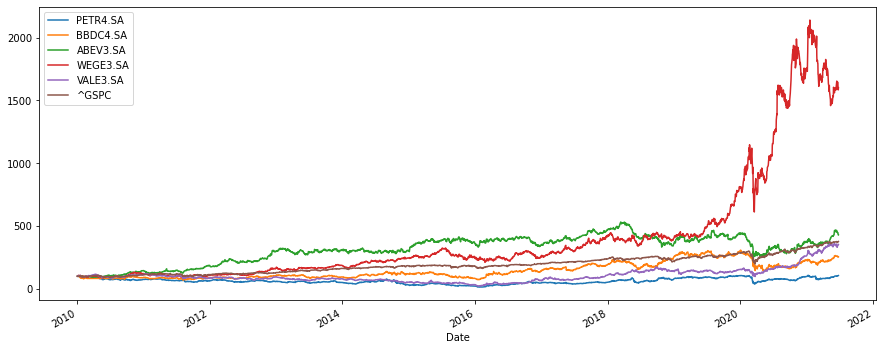

In [22]:
(bolsas / bolsas.iloc[0] * 100).plot(figsize=(15,6));
plt.show

# 3- Medição do risco

### A volatilidade identifica a variabilidade dos rendimentos. Quanto menor a varição, mais estável e menos risco de perdas.

In [23]:
retorno_risco = np.log(bolsas / bolsas.shift(1))
retorno_risco

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA,^GSPC
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.008611,-0.004968,0.005865,-0.002185,0.009279,0.003111
2010-01-06,0.013423,-0.008033,0.010150,0.005453,0.020945,0.000545
2010-01-07,-0.009377,-0.002692,0.004684,0.016717,0.004137,0.003993
2010-01-08,-0.005398,-0.001078,-0.001923,0.035718,0.009711,0.002878
...,...,...,...,...,...,...
2021-06-18,0.006732,-0.012959,-0.013238,0.022124,0.029678,-0.013211
2021-06-21,0.022002,0.002533,-0.001600,0.001704,0.009307,0.013905
2021-06-22,0.005168,-0.018603,-0.023772,-0.027612,0.011647,0.005111


In [24]:
acao_1 = retorno_risco.columns[0]
acao_2 = retorno_risco.columns[1]
acao_3 = retorno_risco.columns[2]
acao_4 = retorno_risco.columns[3]
acao_5 = retorno_risco.columns[4]

In [25]:
media = retorno_risco[[acao_1,acao_2,acao_3,acao_4,acao_5]].mean() * 250
print('Quanto maior a média de retorno anual, maior a lucratividade que a ação rendeu.')
print('Média de retorno anual das ações:')
media

Quanto maior a média de retorno anual, maior a lucratividade que a ação rendeu.
Média de retorno anual das ações:


PETR4.SA    0.004593
BBDC4.SA    0.081872
ABEV3.SA    0.128070
WEGE3.SA    0.244021
VALE3.SA    0.110949
dtype: float64

In [26]:
desvio_padrao = retorno_risco[[acao_1,acao_2,acao_3,acao_4,acao_5]].std() * 250 ** 0.5
print('Quanto maior a volatilidade, maior a chance de ganhos e de perdas bruscas.')
print('Média anual do desvio padrão (volatilidade) das ações:')
desvio_padrao

Quanto maior a volatilidade, maior a chance de ganhos e de perdas bruscas.
Média anual do desvio padrão (volatilidade) das ações:


PETR4.SA    0.473698
BBDC4.SA    0.344472
ABEV3.SA    0.264381
WEGE3.SA    0.316253
VALE3.SA    0.420188
dtype: float64

## Diversificação - Relação entre o preço das ações de diversas empresas

## Covariância

cov > 0 => variáveis se movem na mesma direção

cov < 0 => variáveis se movem em direções opostas

cov = 0 => variáveis são independentes

In [27]:
cov_matrix = retorno_risco.cov()
cov_matrix.round(6)

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA,^GSPC
PETR4.SA,0.000898,0.000382,0.000170,0.000181,0.000378,0.000144
BBDC4.SA,0.000382,0.000475,0.000157,0.000149,0.000228,0.000110
ABEV3.SA,0.000170,0.000157,0.000280,0.000112,0.000121,0.000072
WEGE3.SA,0.000181,0.000149,0.000112,0.000400,0.000127,0.000085
VALE3.SA,0.000378,0.000228,0.000121,0.000127,0.000706,0.000140
^GSPC,0.000144,0.000110,0.000072,0.000085,0.000140,0.000129


In [28]:
cov_matrix_anual = retorno_risco.cov() * 250
cov_matrix_anual.round(3)

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA,^GSPC
PETR4.SA,0.224,0.095,0.042,0.045,0.094,0.036
BBDC4.SA,0.095,0.119,0.039,0.037,0.057,0.027
ABEV3.SA,0.042,0.039,0.070,0.028,0.030,0.018
WEGE3.SA,0.045,0.037,0.028,0.100,0.032,0.021
VALE3.SA,0.094,0.057,0.030,0.032,0.177,0.035
^GSPC,0.036,0.027,0.018,0.021,0.035,0.032


## Correlação

corr = 1 => correlação perfeita

corr > 0 => variáveis se movem na mesma direção

corr = -1 => correlação perfeitamente negativa

corr < 0 => variáveis se movem em direções opostas

corr = 0 => variáveis absolutamente independentes

In [29]:
# Correlação entre o retorno das ações

corr_matrix = retorno_risco.corr()
corr_matrix.round(2)

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA,^GSPC
PETR4.SA,1.00,0.58,0.34,0.30,0.47,0.42
BBDC4.SA,0.58,1.00,0.43,0.34,0.39,0.44
ABEV3.SA,0.34,0.43,1.00,0.34,0.27,0.38
WEGE3.SA,0.30,0.34,0.34,1.00,0.24,0.37
VALE3.SA,0.47,0.39,0.27,0.24,1.00,0.46
^GSPC,0.42,0.44,0.38,0.37,0.46,1.00


<function matplotlib.pyplot.show>

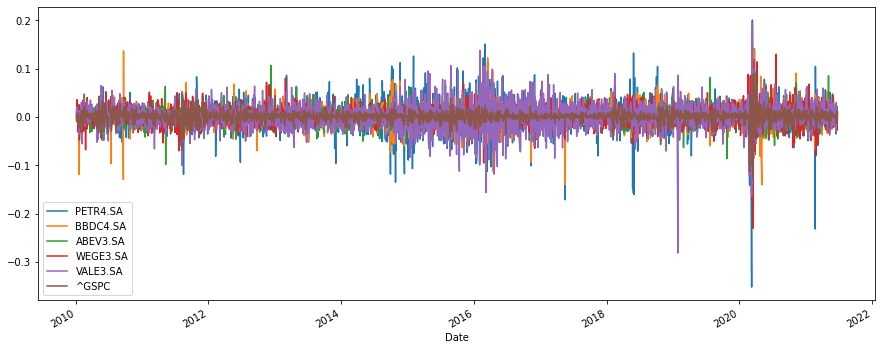

In [30]:
retorno_risco.plot(figsize = (15, 6));
plt.show

In [31]:
# Correlação entre o preço das ações

corr_matrix = bolsas.corr()
corr_matrix.round(2)

,PETR4.SA,BBDC4.SA,ABEV3.SA,WEGE3.SA,VALE3.SA,^GSPC
PETR4.SA,1.00,0.52,-0.19,0.40,0.70,0.30
BBDC4.SA,0.52,1.00,0.68,0.58,0.59,0.85
ABEV3.SA,-0.19,0.68,1.00,0.34,0.13,0.73
WEGE3.SA,0.40,0.58,0.34,1.00,0.82,0.85
VALE3.SA,0.70,0.59,0.13,0.82,1.00,0.70
^GSPC,0.30,0.85,0.73,0.85,0.70,1.00


<function matplotlib.pyplot.show>

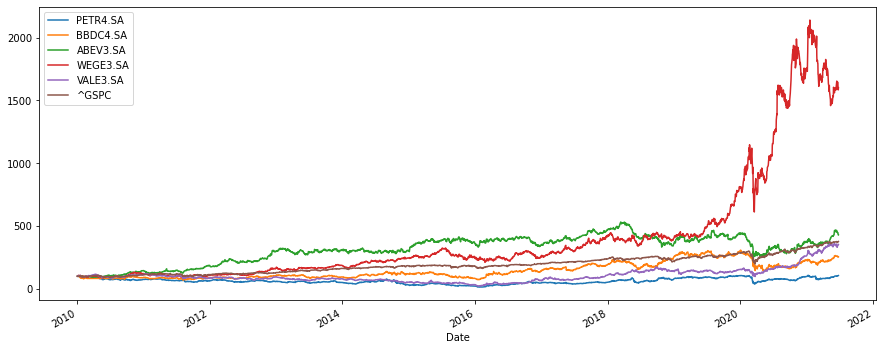

In [32]:
(bolsas / bolsas.iloc[0] * 100).plot(figsize = (15, 6));
plt.show

## Risco do portfólio

In [33]:
# Portfolio com ações de 5 empresas distribuídas igualmente, cada uma representando 20% do total.

bolsas = bolsas[[acao1,acao2,acao3,acao4,acao5]]
retorno_risco = retorno_risco[[acao1,acao2,acao3,acao4,acao5]]
weights = np.array([0.2,0.2,0.2,0.2,0.2])

In [34]:
# Variância do portfólio

pfolio_var = np.dot(weights.T, np.dot(retorno_risco.cov() * 250, weights))
print('A variância do portfólio de ações é de: ' + str(pfolio_var.round(4)))

A variância do portfólio de ações é de: 0.0677


In [35]:
# Volatilidade do portfólio

pfolio_vol = np.dot(weights.T, np.dot(retorno_risco.cov() * 250, weights)) ** 0.5
print('A volatilidade do portfólio de ações é de: ' + str(pfolio_vol.round(4) * 100) + '%')

A volatilidade do portfólio de ações é de: 26.02%


## Risco diversificável e não diversificável do portfólio

### risco diversificável = variância do portfólio - variância anual ponderada

#### Risco diversificável é aquele que o investidor pode reduzir comprando diferentes ações. Quando algumas sobem, outras caem por causa das diferentes condições setoriais às quais esses papéis estão expostos.


In [36]:
# Risco diversificável
# Portfólio com 2 ações, distribuídas igualmente em 50% de cada.

bolsas = bolsas[[acao1,acao2]]
retorno_risco = retorno_risco[[acao1,acao2]]
weights = np.array([0.5,0.5])
pfolio_var = np.dot(weights.T, np.dot(retorno_risco.cov() * 250, weights))

In [37]:
PETR_var_a = retorno_risco[acao1].var() * 250
BBDC_var_a = retorno_risco[acao2].var() * 250

dr = pfolio_var - (weights[0] ** 2 * PETR_var_a) - (weights[1] ** 2 * BBDC_var_a)
print('O risco diversificável do portfólio é de ' + str(round(dr * 100, 2)))

O risco diversificável do portfólio é de 4.77


In [38]:
# Risco não diversificável

n_dr_1 = pfolio_var - dr
print('O risco não diversificável do portfólio é de ' + str(round(n_dr_1 * 100, 2)))

O risco não diversificável do portfólio é de 8.58


In [39]:
if(dr < n_dr_1):
  print('O risco diversificável do portfólio é de ' + str(round(dr * 100, 2)) + '% e o não diversificável é de ' + str(round(n_dr_1 * 100, 2)) + '%.')
  print('Portanto, há menos risco ao optar pelo diversificável.')
else:
  print('O risco diversificável do portfólio é de ' + str(round(dr * 100, 2)) + '% e o não diversificável é de ' + str(round(n_dr_1 * 100, 2)) + '%.')
  print('Portanto, há menos risco ao optar pelo não diversificável.')

O risco diversificável do portfólio é de 4.77% e o não diversificável é de 8.58%.
Portanto, há menos risco ao optar pelo diversificável.


# 4- Otimização de Portfólio de Markowitz

#### A teoria moderna do portfólio, ou simplesmente teoria do portfólio, explica como investidores racionais irão usar o princípio da diversificação para otimizar as suas carteiras de investimentos, e como um ativo arriscado deve ser precificado. O desenvolvimento de modelos de otimização de portfólio tem origem na área econômico-financeira.

#### O trabalho pioneiro na área de otimização de portfólio foi à proposição do modelo média-variância por Markowitz (1952). A teoria do portfólio estabelece que decisões relacionadas à seleção de investimentos devem ser tomadas com base na relação risco-retorno. Para auxiliar neste processo, modelos de otimização de portfólio têm sido desenvolvidos. De modo a serem efetivos, tais modelos devem ser capazes de quantificar os níveis de risco e retorno dos investimentos. 

#### A combinação de ativos com pouca correlação permite aos investidores otimizar seu retorno sem assumir riscos adicionais.

In [40]:
tickers = [acao1,acao2]
bolsas = pd.DataFrame()
for t in tickers:
    bolsas[t] = wb.DataReader(t, data_source='yahoo',start='2010-1-1')['Adj Close']

bolsas.tail(10)

,PETR4.SA,BBDC4.SA
Date,,
2021-06-11,28.570000,28.040001
2021-06-14,28.750000,27.920000
2021-06-15,29.030001,27.940001
2021-06-16,29.139999,28.080000
2021-06-17,28.129999,27.959999
2021-06-18,28.320000,27.600000
2021-06-21,28.950001,27.670000
2021-06-22,29.100000,27.160000
2021-06-23,29.299999,27.040001


## Obter a fronteira eficiente do portfólio

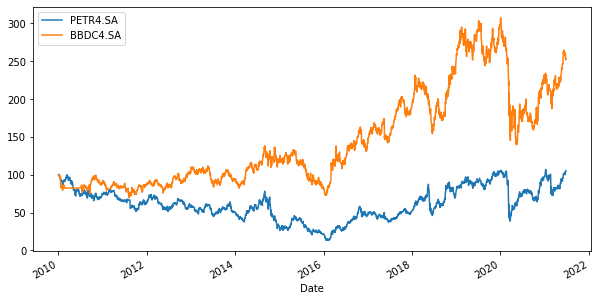

In [41]:
# Normalizando para base 100

(bolsas / bolsas.iloc[0] * 100).plot(figsize=(10,5))

In [42]:
retorno = np.log(bolsas / bolsas.shift(1))
retorno

,PETR4.SA,BBDC4.SA
Date,,
2010-01-04,NaN,NaN
2010-01-05,-0.008611,-0.004968
2010-01-06,0.013423,-0.008033
2010-01-07,-0.009377,-0.002692
2010-01-08,-0.005398,-0.001078
...,...,...
2021-06-18,0.006732,-0.012959
2021-06-21,0.022002,0.002533
2021-06-22,0.005168,-0.018603


In [43]:
retorno.mean() * 250

PETR4.SA    0.004593
BBDC4.SA    0.081872
dtype: float64

In [44]:
retorno.cov() * 250

,PETR4.SA,BBDC4.SA
PETR4.SA,0.224390,0.095442
BBDC4.SA,0.095442,0.118661


In [45]:
retorno.corr()

,PETR4.SA,BBDC4.SA
PETR4.SA,1.000000,0.584905
BBDC4.SA,0.584905,1.000000


In [46]:
num_tickers = len(tickers)
num_tickers

2

In [47]:
weights = np.random.random(num_tickers)
weights /= np.sum(weights)
weights

array([0.53935649, 0.46064351])

In [48]:
weights[0] + weights[1]# + weights[2] + weights[3] + weights[4]

1.0

## Retorno esperado do Portfólio

In [49]:
np.sum(weights * retorno.mean()) * 250

0.04019103692924009

## Variância esperada do Portfólio

---



In [50]:
np.dot(weights.T, np.dot(retorno.cov() *250, weights))

0.13788073042352356

## Volatilidade esperada do Portfólio

In [51]:
np.sqrt(np.dot(weights.T, np.dot(retorno.cov() *250, weights)))

0.3713229462658126

## 1.000 combinações diferentes dos mesmos ativos

In [52]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (10000):
    weights = np.random.random(num_tickers)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * retorno.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(retorno.cov() *250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.02681725, 0.04772894, 0.04523312, ..., 0.03460106, 0.03496812,
        0.0534194 ]),
 array([0.40349448, 0.35755742, 0.36173024, ..., 0.38365495, 0.38279356,
        0.34955816]))

In [53]:
portfolios = pd.DataFrame({'Retorno': pfolio_returns, 'Volatilidade': pfolio_volatilities})
portfolios.head()

,Retorno,Volatilidade
0,0.026817,0.403494
1,0.047729,0.357557
2,0.045233,0.361730
3,0.068362,0.339401
4,0.022273,0.416356


Text(0.5, 1.0, 'Identificar o ponto que apresenta o maior retorno com a menor volatilidade')

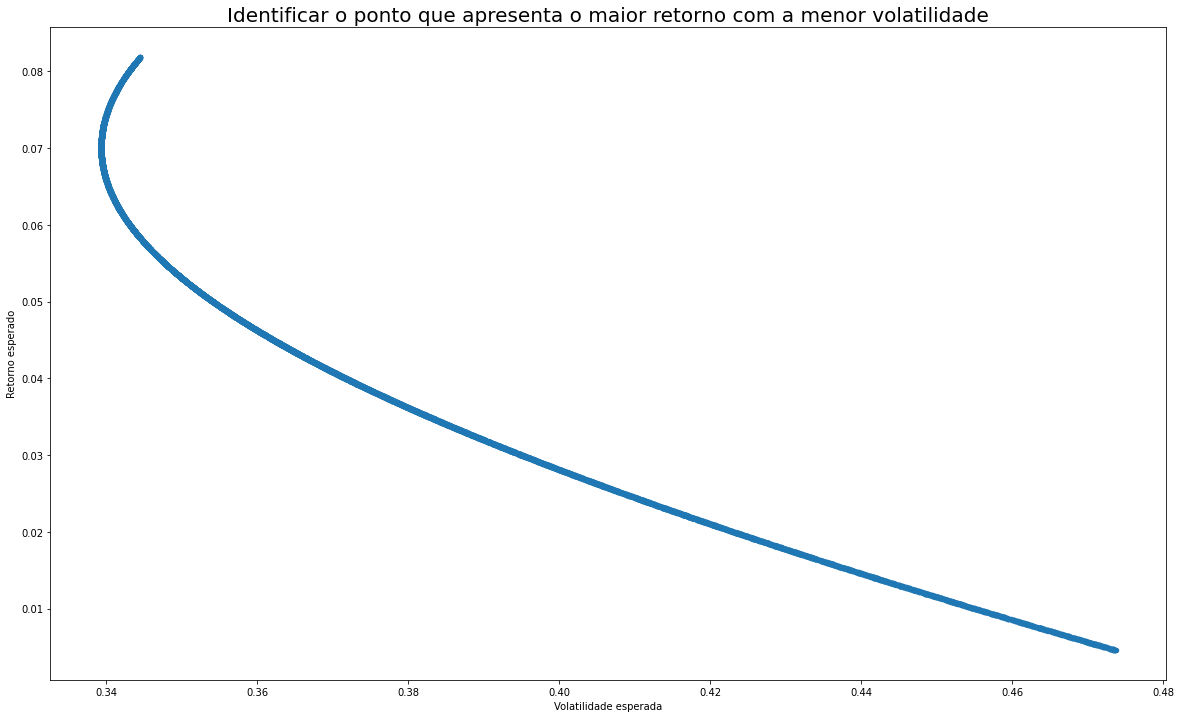

In [54]:
portfolios.plot(x='Volatilidade', y='Retorno', kind='scatter', figsize=(20,12))
plt.xlabel('Volatilidade esperada')
plt.ylabel('Retorno esperado')
plt.title('Identificar o ponto que apresenta o maior retorno com a menor volatilidade', fontsize=20)

# 5- Modelo de Precificação de Ativos Financeiros (CAPM)

### Medindo o Beta
### Mede o risco de mercado que não pode ser evitado através da diversificação.
### Quanto mais volátil uma ação, maior seu beta. O beta varia entre -1 e 2.

### B = 0 nenhuma relação; 
### B < 1 defensiva; 
### B > 1 agressiva
### Ações defensivas perdem menos quando a economia está mal e ganham menos quando estão bem; agressivas são o oposto.

In [55]:
# Neste exemplo usaremos uma ação da indústria automobilística
# F = Ford Motor Company
# ^GSPC = SP500

acao = 'F'
indice = '^GSPC'

tickers = [acao, indice] # ['PETR4.SA','BBDC4.SA','ABEV3.SA','WEGE3.SA','VALE3.SA','^BVSP']
data = pd.DataFrame()
for t in tickers:
    data[t] = wb.DataReader(t, data_source='yahoo',start='2015-1-1')['Adj Close']

data.head()

,F,^GSPC
Date,,
2015-01-02,11.239931,2058.199951
2015-01-05,10.800872,2020.579956
2015-01-06,10.698421,2002.609985
2015-01-07,11.005764,2025.900024
2015-01-08,11.283835,2062.139893


In [56]:
sec_returns = np.log( data / data.shift(1))

In [57]:
cov = sec_returns.cov() * 250
cov

,F,^GSPC
F,0.108109,0.035892
^GSPC,0.035892,0.033728


In [58]:
# Covariação da primeira ação com o mercado.

cov_with_market = cov.iloc[0,1]
cov_with_market

0.0358917274234294

In [59]:
market_var = sec_returns[indice].var() * 250
market_var

0.033728184209784094

In [60]:
F_beta = cov_with_market / market_var
if(F_beta > 1):
  print('Ação agressiva - O Beta da ação é ' + str(F_beta.round(2)) + '. Beta maior que 1 geralmente significa que o ativo é volátil e tende a subir e descer com o mercado.')
elif(F_beta < 1):
  print('Ação defensiva - O Beta da ação é ' + str(F_beta.round(2)) + '. O beta abaixo de 1 pode indicar um investimento com menor volatilidade financeira do que o mercado, ou um investimento volátil cujos movimentos de preço não são altamente correlacionados com o mercado.')
else:
  print('O Beta da ação é ' + str(F_beta.round(2)) + '. É uma ação que não possui relação com o mercado.')

Ação agressiva - O Beta da ação é 1.06. Beta maior que 1 geralmente significa que o ativo é volátil e tende a subir e descer com o mercado.


### Ação livre de risco = retorno de 2,5% 
### Prêmio de risco das ações = entre 4,5% e 5,5%
### Retorno esperado para valer a pena investir na ação


In [61]:
F_er = 0.025 + F_beta * 0.05
print('O valor esperado de retorno da ação é ' + str((F_er * 100).round(2)) + '% ao ano. Se o retorno ficar abaixo do calculado, não vale a pena o risco de investir nessa ação.')

O valor esperado de retorno da ação é 7.82% ao ano. Se o retorno ficar abaixo do calculado, não vale a pena o risco de investir nessa ação.


## Índice de Sharp
### Serve para comparar ações e portfólios e decidir o melhor em termos de risco e retorno, de acordo com o perfil do investidor.

In [62]:
sharpe_F = (F_er - 0.025) / (sec_returns[acao].std() * 250 ** 0.5)
sharpe_F

0.16182302020371978

# 6- Simulações de Monte Carlo
### Serve para observar os possíveis diferentes resultados de um evento futuro, de forma que são executadas simulações e permite ter uma idea da média, valor máximo e valor mínimo esperados.


### 6.1- Prevendo o preço das ações


In [63]:
# Obtém o retorno logaritmico do conjuto de dados

log_returns_1 = np.log(1 + bolsas[acao2].pct_change())

In [64]:
log_returns_1.tail()

Date
2021-06-18   -0.012959
2021-06-21    0.002533
2021-06-22   -0.018603
2021-06-23   -0.004428
2021-06-24    0.007369
Name: BBDC4.SA, dtype: float64

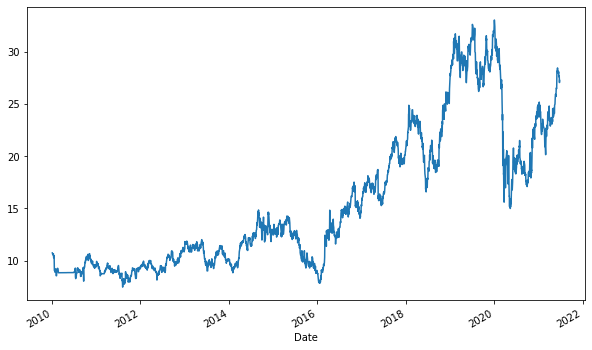

In [65]:
# Gráfico com a evolução histórica do preço da ação

bolsas[acao2].plot(figsize=(10,6))

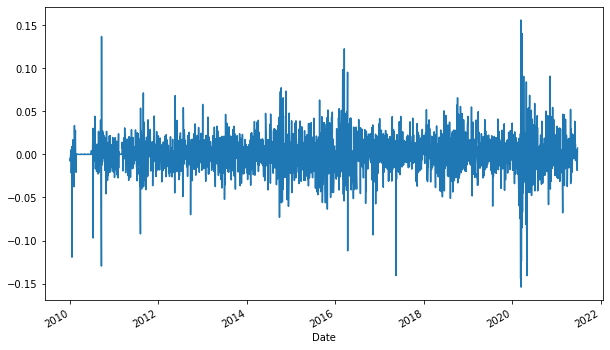

In [66]:
# Gráfico com o retorno logaritmico histórico da ação

log_returns_1.plot(figsize=(10,6))

In [67]:
# Média do retorno

u = log_returns_1.mean()
u

0.00032748986721355616

In [68]:
# Variância do retorno

var = log_returns_1.var()
var

0.0004746433803935028

In [69]:
# Drift é a aproximação das taxas futuras de retorno da ação

drift = u - (0.5 * var)
drift

9.016817701680476e-05

In [70]:
stdev = log_returns_1.std()
stdev

0.02178631176664611

In [71]:
type(drift)

float

In [72]:
type(stdev)

float

In [73]:
np.array(drift)

array(9.0168177e-05)

In [74]:
np.array(stdev)

array(0.02178631)

In [75]:
norm.ppf(0.95)

1.6448536269514722

In [76]:
x = np.random.rand(10,2)
x

array([[0.4592257 , 0.51875633],
       [0.99049009, 0.88014236],
       [0.9503294 , 0.81136452],
       [0.18800563, 0.01531841],
       [0.30495496, 0.75450456],
       [0.45150524, 0.05768889],
       [0.73732783, 0.00278407],
       [0.979284  , 0.19812217],
       [0.65463829, 0.73681111],
       [0.66828988, 0.26881324]])

In [77]:
norm.ppf(x)

array([[-0.10238461,  0.04703248],
       [ 2.34514214,  1.17569872],
       [ 1.6480559 ,  0.8829358 ],
       [-0.88526956, -2.16175809],
       [-0.51020204,  0.68873368],
       [-0.12185927, -1.57447459],
       [ 0.63512891, -2.77218462],
       [ 2.03918074, -0.84834775],
       [ 0.39787352,  0.63354504],
       [ 0.4351959 , -0.61640618]])

In [78]:
z = norm.ppf(np.random.rand(10,2))
z

array([[ 0.526593  ,  1.98606623],
       [-0.99087369, -0.32061627],
       [ 0.513071  , -0.01290171],
       [-1.11909603, -0.35726703],
       [-0.51982345, -1.5941276 ],
       [ 0.51844665, -1.23204415],
       [ 1.51054083,  0.20385335],
       [-0.29219801, -0.39595585],
       [-0.59964404,  0.67483659],
       [-0.10204401,  1.0930092 ]])

In [79]:
t_intervals = 100 # quantidade de dias futuros que a previsão contemplará
iterations = 10

In [80]:
daily_returns = np.exp(np.array(drift) + np.array(stdev) * norm.ppf(np.random.rand(t_intervals, iterations)))

In [81]:
s0 = bolsas[acao2].iloc[-1]
s0

27.239999771118164

Text(0.5, 1.0, 'Preço máximo, mínimo e médio esperado do preço da ação nos próximos 100 dias.')

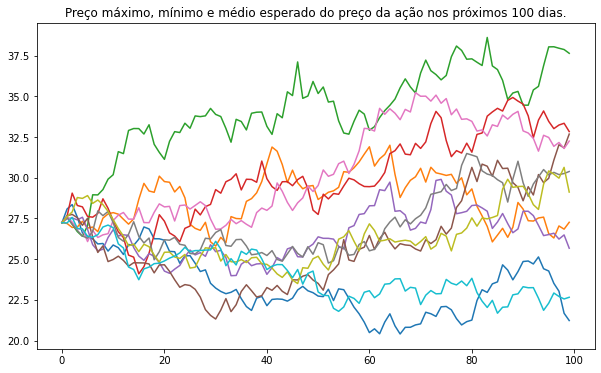

In [82]:
price_list = np.zeros_like(daily_returns)
price_list[0] = s0
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]
plt.figure(figsize=(10,6))
plt.plot(price_list)
plt.title('Preço máximo, mínimo e médio esperado do preço da ação nos próximos ' + str(t_intervals) + ' dias.')